## Welcome to the Second Lab - Week 1, Day 3

Today we will work with lots of models! This is a way to get comfortable with APIs.

<table style="margin: 0; text-align: left; width:100%">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../assets/stop.png" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#ff7800;">Important point - please read</h2>
            <span style="color:#ff7800;">The way I collaborate with you may be different to other courses you've taken. I prefer not to type code while you watch. Rather, I execute Jupyter Labs, like this, and give you an intuition for what's going on. My suggestion is that you carefully execute this yourself, <b>after</b> watching the lecture. Add print statements to understand what's going on, and then come up with your own variations.<br/><br/>If you have time, I'd love it if you submit a PR for changes in the community_contributions folder - instructions in the resources. Also, if you have a Github account, use this to showcase your variations. Not only is this essential practice, but it demonstrates your skills to others, including perhaps future clients or employers...
            </span>
        </td>
    </tr>
</table>

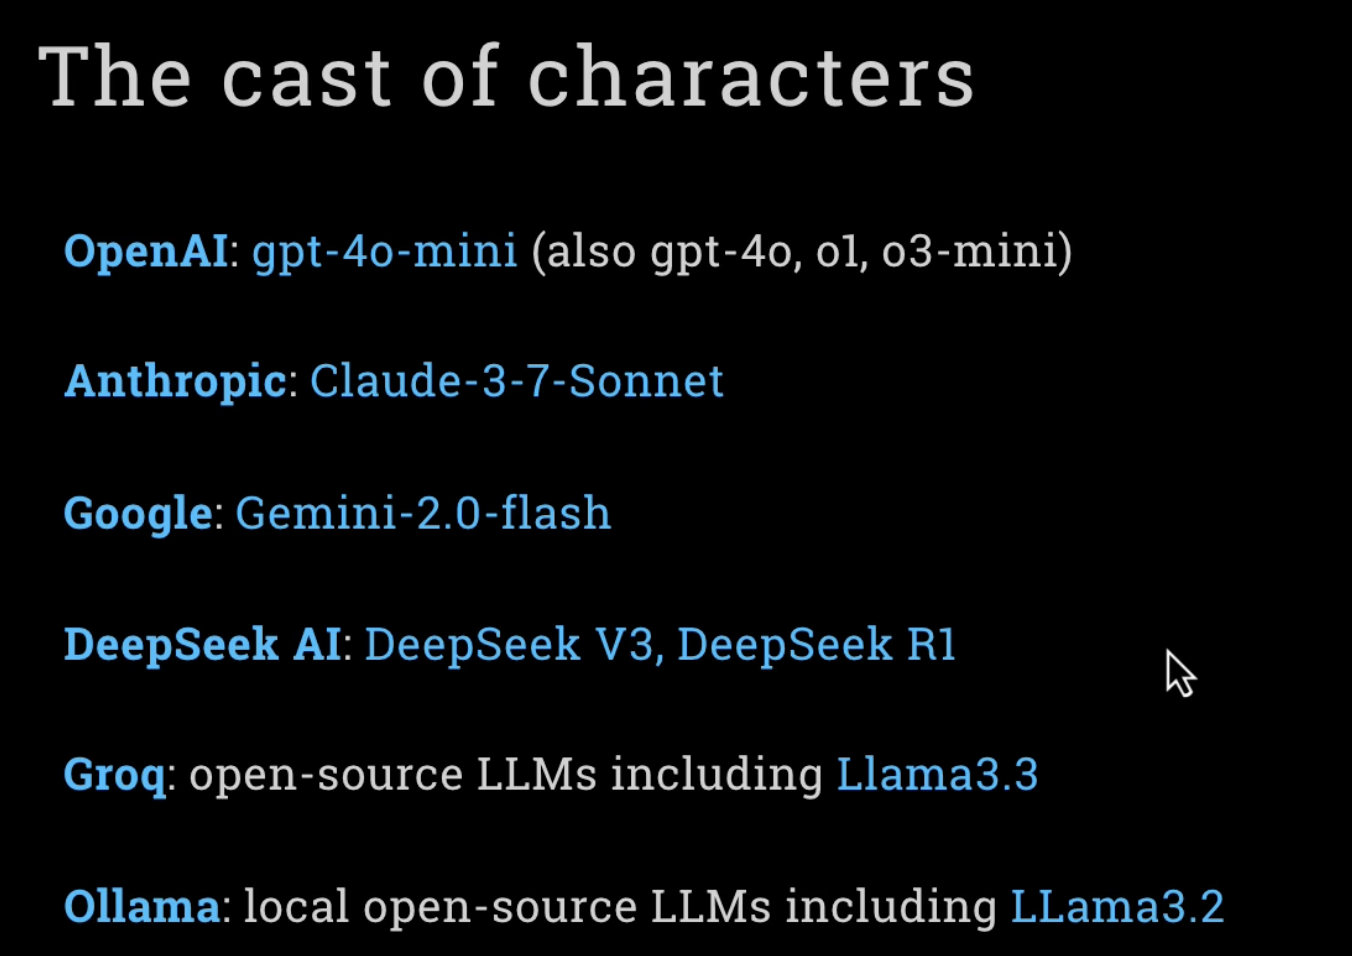

In [1]:
# Start with imports - ask ChatGPT to explain any package that you don't know

import os
import json
from dotenv import load_dotenv
from openai import OpenAI
from anthropic import Anthropic
from IPython.display import Markdown, display

In [ ]:
# Always remember to do this!
load_dotenv(override=True)

In [ ]:
# Print the key prefixes to help with any debugging

openai_api_key = os.getenv('OPENAI_API_KEY')
anthropic_api_key = os.getenv('ANTHROPIC_API_KEY')
google_api_key = os.getenv('GOOGLE_API_KEY')
deepseek_api_key = os.getenv('DEEPSEEK_API_KEY')
groq_api_key = os.getenv('GROQ_API_KEY')

if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")
    
if anthropic_api_key:
    print(f"Anthropic API Key exists and begins {anthropic_api_key[:7]}")
else:
    print("Anthropic API Key not set (and this is optional)")

if google_api_key:
    print(f"Google API Key exists and begins {google_api_key[:2]}")
else:
    print("Google API Key not set (and this is optional)")

if deepseek_api_key:
    print(f"DeepSeek API Key exists and begins {deepseek_api_key[:3]}")
else:
    print("DeepSeek API Key not set (and this is optional)")

if groq_api_key:
    print(f"Groq API Key exists and begins {groq_api_key[:4]}")
else:
    print("Groq API Key not set (and this is optional)")

**Note - We may notice below there is no system prompt. This is because system prompts are optional and nor mandatory to be sent.**

In [4]:
request = "Please come up with a challenging, nuanced question that I can ask a number of LLMs to evaluate their intelligence. "
request += "Answer only with the question, no explanation."
messages = [{"role": "user", "content": request}]

In [ ]:
messages

In [ ]:
openai = OpenAI()
response = openai.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
)
question = response.choices[0].message.content
print(question)


In [7]:
competitors = []
answers = []
messages = [{"role": "user", "content": question}]

We declared three varibales here -
1. competitors - List of different LLMs that will server as the competitors here in this use case.
2. answers = List of answers given by each of the competitor or LLMs to the same question.
3. question will be the question that we got from gpt-4o-mini as part of our original question.

In [ ]:
# The API we know well

model_name = "gpt-4o-mini"

response = openai.chat.completions.create(model=model_name, messages=messages)
answer = response.choices[0].message.content

display(Markdown(answer))
competitors.append(model_name)
answers.append(answer)

In [ ]:
# Anthropic has a slightly different API, and Max Tokens is required

model_name = "claude-3-7-sonnet-latest"

claude = Anthropic()
response = claude.messages.create(model=model_name, messages=messages, max_tokens=1000)
answer = response.content[0].text

display(Markdown(answer))
competitors.append(model_name)
answers.append(answer)

### Note - While initializing the client for Gemini we are using the OpenAI python library. This is because the openAI library is simply a library that wraps http calls to the models. Since this is a generic code , google decided to make their models accessible from the same library, and many other vendors did so too.

### How this works is when we when we initialize the client , we can pass a base url and here we see the google's endpoint . 
The client initialization method takes the parameters of the api key and the endpoint of vendor we want to call.



**Note - Only anthropic has not used this template , remaining all other vendors have done this . We also see Deppseek using the same format below.**

In [ ]:
gemini = OpenAI(api_key=google_api_key, base_url="https://generativelanguage.googleapis.com/v1beta/openai/")
model_name = "gemini-2.0-flash"

response = gemini.chat.completions.create(model=model_name, messages=messages)
answer = response.choices[0].message.content

display(Markdown(answer))
competitors.append(model_name)
answers.append(answer)

In [ ]:
deepseek = OpenAI(api_key=deepseek_api_key, base_url="https://api.deepseek.com/v1")
model_name = "deepseek-chat"

response = deepseek.chat.completions.create(model=model_name, messages=messages)
answer = response.choices[0].message.content

display(Markdown(answer))
competitors.append(model_name)
answers.append(answer)

In [ ]:
groq = OpenAI(api_key=groq_api_key, base_url="https://api.groq.com/openai/v1")
model_name = "llama-3.3-70b-versatile"

response = groq.chat.completions.create(model=model_name, messages=messages)
answer = response.choices[0].message.content

display(Markdown(answer))
competitors.append(model_name)
answers.append(answer)


## For the next cell, we will use Ollama

Ollama runs a local web service that gives an OpenAI compatible endpoint,  
and runs models locally using high performance C++ code.

If you don't have Ollama, install it here by visiting https://ollama.com then pressing Download and following the instructions.

After it's installed, you should be able to visit here: http://localhost:11434 and see the message "Ollama is running"

You might need to restart Cursor (and maybe reboot). Then open a Terminal (control+\`) and run `ollama serve`

Useful Ollama commands (run these in the terminal, or with an exclamation mark in this notebook):

`ollama pull <model_name>` downloads a model locally  
`ollama ls` lists all the models you've downloaded  
`ollama rm <model_name>` deletes the specified model from your downloads

<table style="margin: 0; text-align: left; width:100%">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../assets/stop.png" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#ff7800;">Super important - ignore me at your peril!</h2>
            <span style="color:#ff7800;">The model called <b>llama3.3</b> is FAR too large for home computers - it's not intended for personal computing and will consume all your resources! Stick with the nicely sized <b>llama3.2</b> or <b>llama3.2:1b</b> and if you want larger, try llama3.1 or smaller variants of Qwen, Gemma, Phi or DeepSeek. See the <A href="https://ollama.com/models">the Ollama models page</a> for a full list of models and sizes.
            </span>
        </td>
    </tr>
</table>

In [ ]:
!ollama pull llama3.2

In [ ]:
ollama = OpenAI(base_url='http://localhost:11434/v1', api_key='ollama')
model_name = "llama3.2"

response = ollama.chat.completions.create(model=model_name, messages=messages)
answer = response.choices[0].message.content

display(Markdown(answer))
competitors.append(model_name)
answers.append(answer)

## Now that we have the answers from many models we will be evaluating the responses of the LLMs using a LLM.

In [ ]:
# So where are we?

print(competitors)
print(answers)


### zip is a python package that can iterate through two lists at a time

In [ ]:
# It's nice to know how to use "zip"
for competitor, answer in zip(competitors, answers):
    print(f"Competitor: {competitor}\n\n{answer}")


### With enumerate we get a counter for the loop starting with 1 not 0

In [20]:
# Let's bring this together - note the use of "enumerate"

together = ""
for index, answer in enumerate(answers):
    together += f"# Response from competitor {index+1}\n\n"
    together += answer + "\n\n"

In [ ]:
print(together)

In [22]:
judge = f"""You are judging a competition between {len(competitors)} competitors.
Each model has been given this question:

{question}

Your job is to evaluate each response for clarity and strength of argument, and rank them in order of best to worst.
Respond with JSON, and only JSON, with the following format:
{{"results": ["best competitor number", "second best competitor number", "third best competitor number", ...]}}

Here are the responses from each competitor:

{together}

Now respond with the JSON with the ranked order of the competitors, nothing else. Do not include markdown formatting or code blocks."""


### Above is our prompt to judge the response from all the LLMs.

We have not given it the name of the models.

**Note - AT the end we added Do not include markdown formatting since the Models generally tend to return the response in markdown**

In [ ]:
print(judge)

In [29]:
judge_messages = [{"role": "user", "content": judge}]

In [ ]:
# Judgement time!

openai = OpenAI()
response = openai.chat.completions.create(
    model="o3-mini",
    messages=judge_messages,
)
results = response.choices[0].message.content
print(results)


In [ ]:
# OK let's turn this into results!

results_dict = json.loads(results)
ranks = results_dict["results"]
for index, result in enumerate(ranks):
    competitor = competitors[int(result)-1]
    print(f"Rank {index+1}: {competitor}")

<table style="margin: 0; text-align: left; width:100%">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../assets/exercise.png" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#ff7800;">Exercise</h2>
            <span style="color:#ff7800;">Which pattern(s) did this use? Try updating this to add another Agentic design pattern.
            </span>
        </td>
    </tr>
</table>

<table style="margin: 0; text-align: left; width:100%">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../assets/business.png" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#00bfff;">Commercial implications</h2>
            <span style="color:#00bfff;">These kinds of patterns - to send a task to multiple models, and evaluate results,
            are common where you need to improve the quality of your LLM response. This approach can be universally applied
            to business projects where accuracy is critical.
            </span>
        </td>
    </tr>
</table>